In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('total.csv', sep=';')

In [3]:
df['Current price'] = df['Current price'].str.replace(r'\$', '')
#попросил сгенерить ChatGPT по запросу 'Как убрать знак из элементов списка находящегося в списке'
df[['Current price']] = df[['Current price']].astype(float)
df

<ipython-input-3-9b8db9e1596f>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Current price'] = df['Current price'].str.replace(r'\$', '')


,Game title,Amount of recommendations,Current price,Current discount,Genre,Publisher,Rating,Names,Collection,Release,engine,Platforms
0,Counter-Strike: Global Offensive,"2,999,135",0.00,0,Shooter,Hidden Path Entertainment,81.000000,"Counter-Strike: Ofensiva Global, Counterstrike...",Counter-Strike,21-08-2012,Source,"Linux, PC (Microsoft Windows), PlayStation 3, ..."
1,PUBG: BATTLEGROUNDS,"1,382,744",29.99,0,Shooter,Bluehole Studio,75.062500,"Battlegrounds, Player Unknown, PUBG, PLAYERUNK...",NaN,20-12-2017,Unreal Engine 4,"PC (Microsoft Windows), PlayStation 4, Xbox On..."
2,Tom Clancy's Rainbow Six Siege,"710,454",19.99,0,Shooter,Ubisoft Montreal,74.166667,"R6:S, R6S, R6: Siege, 彩虹六号：围攻, Regenbogen 6 Be...",Rainbow Six,01-12-2020,AnvilNext,"PC (Microsoft Windows), PlayStation 4, Xbox On..."
3,Garry's Mod,"557,779",9.99,0,Simulator,Facepunch Studios,NaN,"GMod, 게리 모드, gmod 9, gmod",NaN,24-12-2004,Source,"Linux, PC (Microsoft Windows), Mac"
4,Terraria,"536,708",9.99,0,Platform,Headup Games,81.000000,"Terraria: Journey's End, テラリア, 테라리아 (Terraria)...",Terraria,16-05-2011,NaN,"Linux, PC (Microsoft Windows), PlayStation 3, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2187,Yomawari: Midnight Shadows,303,19.99,0,Puzzle,NIS America,83.000000,深夜廻,NaN,24-10-2017,NaN,"PC (Microsoft Windows), PlayStation Vita, Play..."
2188,SiNKR,302,3.99,0,Puzzle,Robert Wahler,68.333333,"シズめル, SiNKR",NaN,12-10-2017,NaN,"Linux, PC (Microsoft Windows), Mac, iOS, Xbox One"
2189,Invisigun Reloaded,302,19.99,0,Arcade,Sombr Studio LLC,NaN,Invisigun Heroes,NaN,22-08-2019,NaN,"Linux, PC (Microsoft Windows), Mac, iOS, PlayS..."
2190,Tropico 3: Absolute Power,302,9.99,0,Real Time Strategy (RTS),Haemimont Games,NaN,"Тропико 3: Абсолютная власть. Дополнение, トロピコ...",Tropico,17-05-2010,NaN,PC (Microsoft Windows)


In [4]:
df['Current discount'] = df['Current discount'].apply(lambda x: x.replace('%',''))
df[['Current discount']] = abs(df[['Current discount']].astype(int))

In [5]:
df = df.rename(columns = {'Current discount' : 'Current discount in percent'})

In [6]:
df['Amount of recommendations'] = df['Amount of recommendations'].apply(lambda x: x.replace(',',''))
df[['Amount of recommendations']] = df[['Amount of recommendations']].astype(int)

In [7]:
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df['Rating'] = df['Rating'].astype(int)

In [8]:
df['Release'] = [date.split('-')[2] for date in df['Release']]
df['Release'] = df['Release'].astype(int)
df

,Game title,Amount of recommendations,Current price,Current discount in percent,Genre,Publisher,Rating,Names,Collection,Release,engine,Platforms
0,Counter-Strike: Global Offensive,2999135,0.00,0,Shooter,Hidden Path Entertainment,81,"Counter-Strike: Ofensiva Global, Counterstrike...",Counter-Strike,2012,Source,"Linux, PC (Microsoft Windows), PlayStation 3, ..."
1,PUBG: BATTLEGROUNDS,1382744,29.99,0,Shooter,Bluehole Studio,75,"Battlegrounds, Player Unknown, PUBG, PLAYERUNK...",NaN,2017,Unreal Engine 4,"PC (Microsoft Windows), PlayStation 4, Xbox On..."
2,Tom Clancy's Rainbow Six Siege,710454,19.99,0,Shooter,Ubisoft Montreal,74,"R6:S, R6S, R6: Siege, 彩虹六号：围攻, Regenbogen 6 Be...",Rainbow Six,2020,AnvilNext,"PC (Microsoft Windows), PlayStation 4, Xbox On..."
3,Garry's Mod,557779,9.99,0,Simulator,Facepunch Studios,74,"GMod, 게리 모드, gmod 9, gmod",NaN,2004,Source,"Linux, PC (Microsoft Windows), Mac"
4,Terraria,536708,9.99,0,Platform,Headup Games,81,"Terraria: Journey's End, テラリア, 테라리아 (Terraria)...",Terraria,2011,NaN,"Linux, PC (Microsoft Windows), PlayStation 3, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
2187,Yomawari: Midnight Shadows,303,19.99,0,Puzzle,NIS America,83,深夜廻,NaN,2017,NaN,"PC (Microsoft Windows), PlayStation Vita, Play..."
2188,SiNKR,302,3.99,0,Puzzle,Robert Wahler,68,"シズめル, SiNKR",NaN,2017,NaN,"Linux, PC (Microsoft Windows), Mac, iOS, Xbox One"
2189,Invisigun Reloaded,302,19.99,0,Arcade,Sombr Studio LLC,74,Invisigun Heroes,NaN,2019,NaN,"Linux, PC (Microsoft Windows), Mac, iOS, PlayS..."
2190,Tropico 3: Absolute Power,302,9.99,0,Real Time Strategy (RTS),Haemimont Games,74,"Тропико 3: Абсолютная власть. Дополнение, トロピコ...",Tropico,2010,NaN,PC (Microsoft Windows)


Несколько интересных фактов про цены

In [9]:
cnt = 0
for i in df['Current price']:
  if int(i*100) % 100 == 99:
    cnt += 1
cnt

1613

Забавный факт, что в 1613 игр из 2192 цена является не круглой, а меньше на 1 цент (например, 19.99).

In [10]:
df['Current price'].mode().values[0]

19.99

In [11]:
df['Current price'].max()

79.99

In [12]:
df['Current price'].min()

0.0

In [13]:
round(df['Current price'].mean(), 2)

17.89

Интересно заметить, что наиболее популярная цена на игры среди выборки это 19.99, средняя - 17.89, максимальная - 79.99, минимальная - 0.00. Можно также обратить внимание, что в выборке данные распределены асимметрично, так как средняя цена меньше моды на 2.1 долларов.

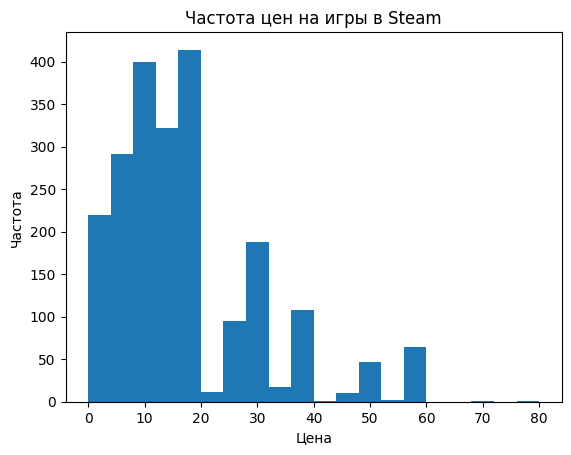

In [14]:
plt.hist(df['Current price'], bins = 20)
plt.xlabel('Цена')
plt.ylabel('Частота')
plt.title('Частота цен на игры в Steam');

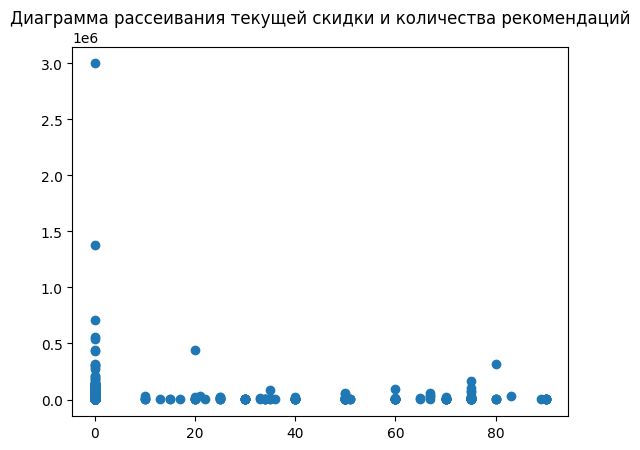

In [80]:
plt.scatter(df['Current discount in percent'], df['Amount of recommendations'])
plt.title('Диаграмма рассеивания текущей скидки и количества рекомендаций');

По диаграмме можно заметить, что особой корреляции между этими признаками нет

In [81]:
df['Current discount in percent'].corr(df['Amount of recommendations'])

0.003367349477991971

Посчитанная корреляция Пирсона подтверждает предыдущее утверждение

In [15]:
df['Release'].mode().values[0]

2019

Самым популярным годом выпуска является 2019 год.

Можно посмотреть, как изменялось количество выпущенных игр с каждым годом

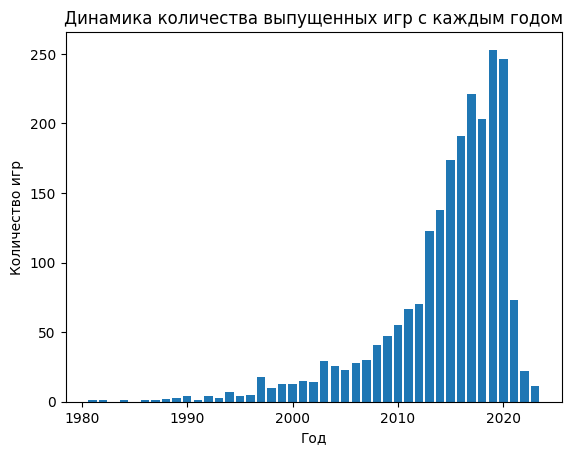

In [37]:
plt.bar(df.groupby('Release').size().index, df.groupby('Release').size().values)
plt.xlabel('Год')
plt.ylabel('Количество игр')
plt.title('Динамика количества выпущенных игр с каждым годом');

Как можно заметить, с каждым годов выпускалось всё больше игр, но в последние 2 года динамика стала немного меньше

Для удобства в колонке Engine посчитаем одинаковые движки разных версий, а именно Source и Source 2 и Unreal Engine 1-4, как одни движки Source и Unreal Engine

In [16]:
df['engine'] = df['engine'].astype(str)

In [17]:
lst = [x for x in df['engine'] if x.startswith('Unreal')]

In [18]:
df['engine'].loc[df['engine'].str.startswith('Unreal')] = 'Unreal Engine'

<ipython-input-18-10eb96f4bce5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine'].loc[df['engine'].str.startswith('Unreal')] = 'Unreal Engine'


In [19]:
df['engine'].loc[df['engine'].str.startswith('Source')] = 'Source'

<ipython-input-19-9efc550ba217>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['engine'].loc[df['engine'].str.startswith('Source')] = 'Source'


Посчитаем nan движки как один определённый Unique

In [20]:
df['engine'] = df['engine'].replace('nan', 'Unique')

Добавим колонку Number of Platforms

In [21]:
df['Platforms'].astype(str)
def count_elements(types):
    return len(types.split(','))
df['Number of Platforms'] = df['Platforms'].apply(count_elements)

In [22]:
df

,Game title,Amount of recommendations,Current price,Current discount in percent,Genre,Publisher,Rating,Names,Collection,Release,engine,Platforms,Number of Platforms
0,Counter-Strike: Global Offensive,2999135,0.00,0,Shooter,Hidden Path Entertainment,81,"Counter-Strike: Ofensiva Global, Counterstrike...",Counter-Strike,2012,Source,"Linux, PC (Microsoft Windows), PlayStation 3, ...",5
1,PUBG: BATTLEGROUNDS,1382744,29.99,0,Shooter,Bluehole Studio,75,"Battlegrounds, Player Unknown, PUBG, PLAYERUNK...",NaN,2017,Unreal Engine,"PC (Microsoft Windows), PlayStation 4, Xbox On...",4
2,Tom Clancy's Rainbow Six Siege,710454,19.99,0,Shooter,Ubisoft Montreal,74,"R6:S, R6S, R6: Siege, 彩虹六号：围攻, Regenbogen 6 Be...",Rainbow Six,2020,AnvilNext,"PC (Microsoft Windows), PlayStation 4, Xbox On...",6
3,Garry's Mod,557779,9.99,0,Simulator,Facepunch Studios,74,"GMod, 게리 모드, gmod 9, gmod",NaN,2004,Source,"Linux, PC (Microsoft Windows), Mac",3
4,Terraria,536708,9.99,0,Platform,Headup Games,81,"Terraria: Journey's End, テラリア, 테라리아 (Terraria)...",Terraria,2011,Unique,"Linux, PC (Microsoft Windows), PlayStation 3, ...",15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,Yomawari: Midnight Shadows,303,19.99,0,Puzzle,NIS America,83,深夜廻,NaN,2017,Unique,"PC (Microsoft Windows), PlayStation Vita, Play...",3
2188,SiNKR,302,3.99,0,Puzzle,Robert Wahler,68,"シズめル, SiNKR",NaN,2017,Unique,"Linux, PC (Microsoft Windows), Mac, iOS, Xbox One",5
2189,Invisigun Reloaded,302,19.99,0,Arcade,Sombr Studio LLC,74,Invisigun Heroes,NaN,2019,Unique,"Linux, PC (Microsoft Windows), Mac, iOS, PlayS...",6
2190,Tropico 3: Absolute Power,302,9.99,0,Real Time Strategy (RTS),Haemimont Games,74,"Тропико 3: Абсолютная власть. Дополнение, トロピコ...",Tropico,2010,Unique,PC (Microsoft Windows),1


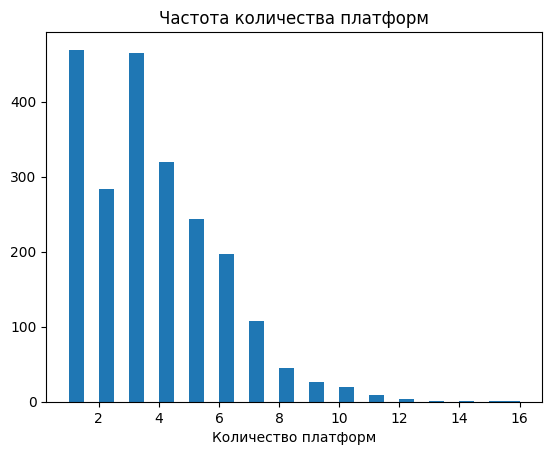

In [70]:
plt.hist(df['Number of Platforms'], bins = 30)
plt.xlabel('Количество платформ')
plt.title('Частота количества платформ');

Больше всего игр выпускаются на 1 либо на 3 платформах

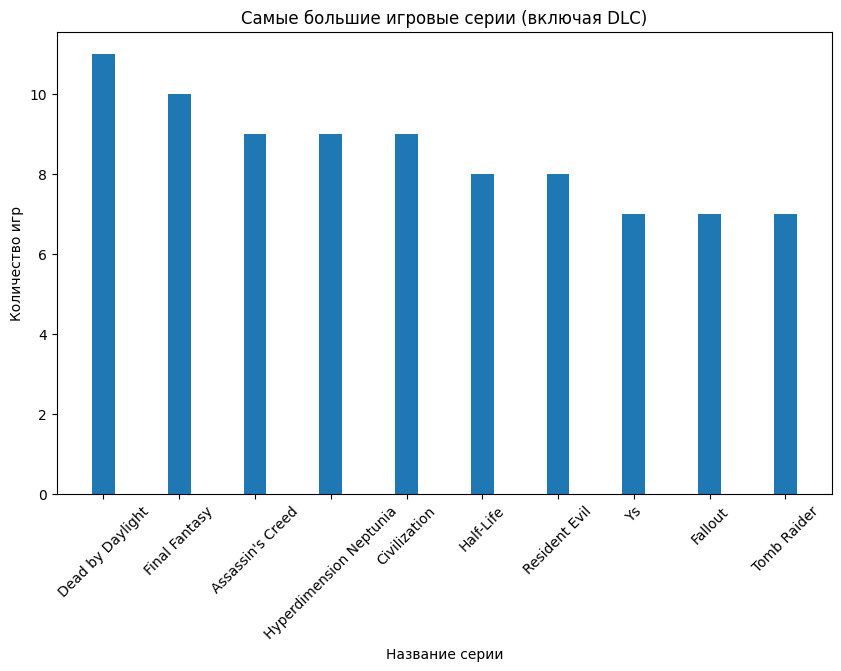

In [62]:
plt.figure(figsize=(10, 6))
plt.bar(df['Collection'].value_counts().index[:10], df['Collection'].value_counts().values[:10], width = 0.3)
plt.xticks(rotation=45)
plt.xlabel('Название серии')
plt.ylabel('Количество игр')
plt.title('Самые большие игровые серии (включая DLC)');

Топ-10 самых больших игровых серий (включая DLC)

In [24]:
df.corr()

<ipython-input-24-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Amount of recommendations,Current price,Current discount in percent,Rating,Release,Number of Platforms
Amount of recommendations,1.000000,0.031073,0.003367,0.058062,0.010712,0.077259
Current price,0.031073,1.000000,-0.203372,0.085526,0.244371,0.056671
Current discount in percent,0.003367,-0.203372,1.000000,-0.028294,0.072311,0.024819
Rating,0.058062,0.085526,-0.028294,1.000000,-0.014955,0.102697
Release,0.010712,0.244371,0.072311,-0.014955,1.000000,0.073666
Number of Platforms,0.077259,0.056671,0.024819,0.102697,0.073666,1.000000


Параметрами с наибольшей корреляцией с Amount of recommendations являются Number of Platforms, Rating, Current Price

In [25]:
df.to_csv('clean.csv', sep=';', index=False)